In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# exploratory data analysis

data = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(data.head())
print(data.info())
print(data.describe())

# check for missing values
print(data.isnull().sum())

data

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [11]:
print(f"\nTarget Variable: Attrition")
print(f"Features: {data.shape[1] - 1}")
print(f"\nData Types Breakdown:")
print(data.dtypes.value_counts())
print()

# Check target variable distribution
print("Attrition distribution:")
print(data['Attrition'].value_counts())
print("\nAttrition percentage:")
print(data['Attrition'].value_counts(normalize=True) * 100)


Target Variable: Attrition
Features: 34

Data Types Breakdown:
int64    26
str       9
Name: count, dtype: int64

Attrition distribution:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Attrition percentage:
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


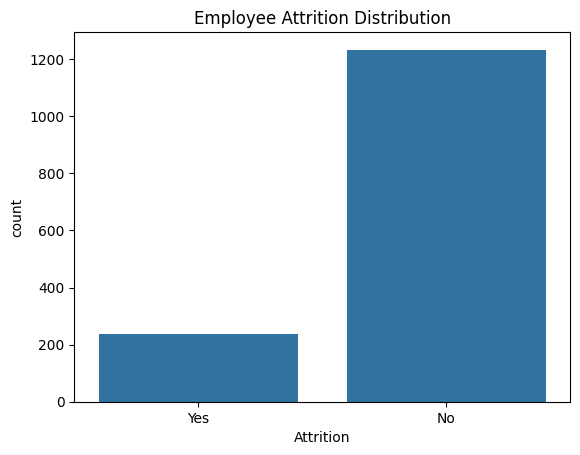

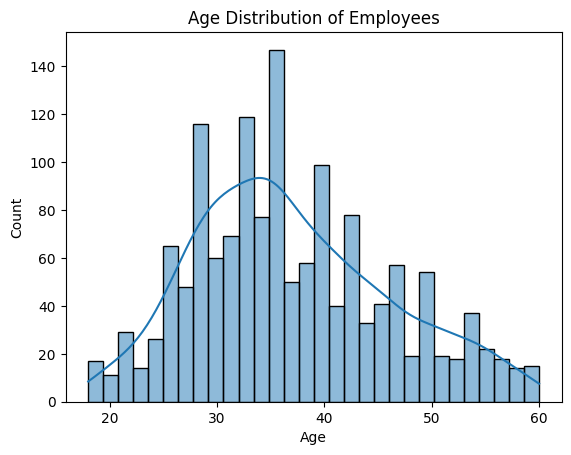

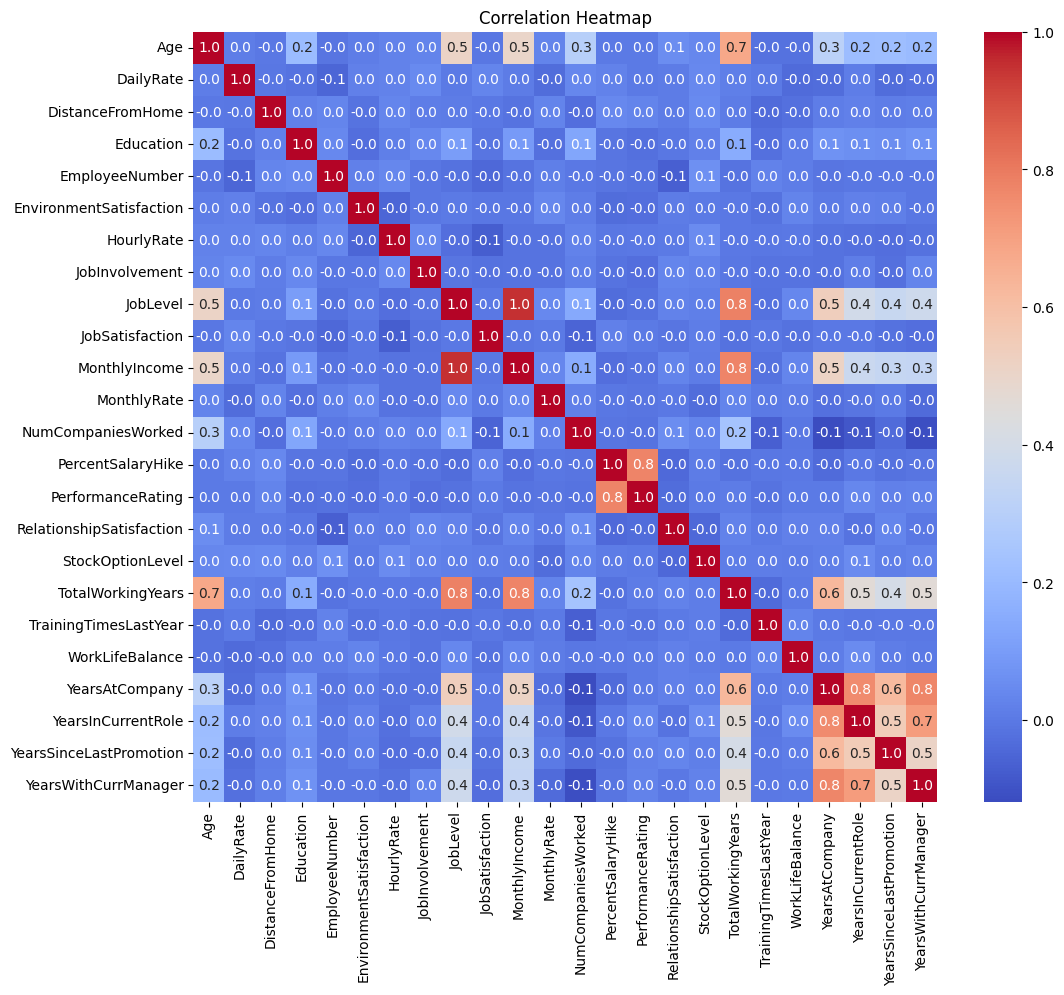

In [19]:
# visualize attrition distribution
sns.countplot(x='Attrition', data=data)
plt.title('Employee Attrition Distribution')
plt.show()

# visualize age distribution
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution of Employees')
plt.show()

# drop columns with only 1 unique value
for column in data.columns:
    if data[column].nunique() == 1:
        data.drop(column, axis=1, inplace=True)

# correlation heatmap (drop non-numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12,10))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# Top features correlated with attrition
data_temp = data.copy()
data_temp['Attrition_num'] = data_temp['Attrition'].map({'Yes': 1, 'No': 0})

numeric_cols = data_temp.select_dtypes(include=[np.number]).columns
correlations = data_temp[numeric_cols].corr()['Attrition_num'].sort_values(ascending=False)

print("Top 10 features correlated with Attrition:")
print(correlations[1:11])

print("\nBottom 10 features correlated with Attrition:")
print(correlations[-10:])

Top 10 features correlated with Attrition:
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
Name: Attrition_num, dtype: float64

Bottom 10 features correlated with Attrition:
YearsAtCompany         -0.134392
StockOptionLevel       -0.137145
YearsWithCurrManager   -0.156199
Age                    -0.159205
MonthlyIncome          -0.159840
YearsInCurrentRole     -0.160545
JobLevel               -0.169105
TotalWorkingYears      -0.171063
EmployeeCount                NaN
StandardHours                NaN
Name: Attrition_num, dtype: float64


In [ ]:
# value counts
for column in data.columns:
    print(f'Value counts for {column}:')
    print(data[column].value_counts().head(10))
    print()


Value counts for Age:
Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
Name: count, dtype: int64

Value counts for Attrition:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Value counts for BusinessTravel:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Value counts for DailyRate:
DailyRate
691     6
408     5
1082    5
530     5
1329    5
329     5
334     4
1125    4
427     4
1225    4
Name: count, dtype: int64

Value counts for Department:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Value counts for DistanceFromHome:
DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
Name: count, dtype: int64

Value counts for Education:
Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

Valu

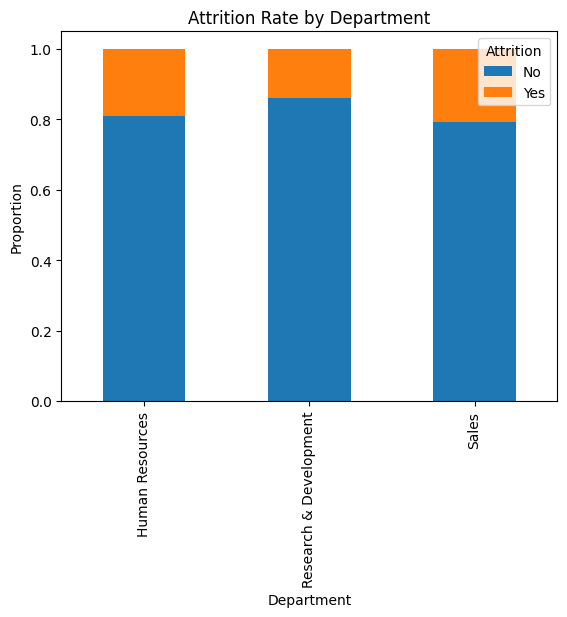

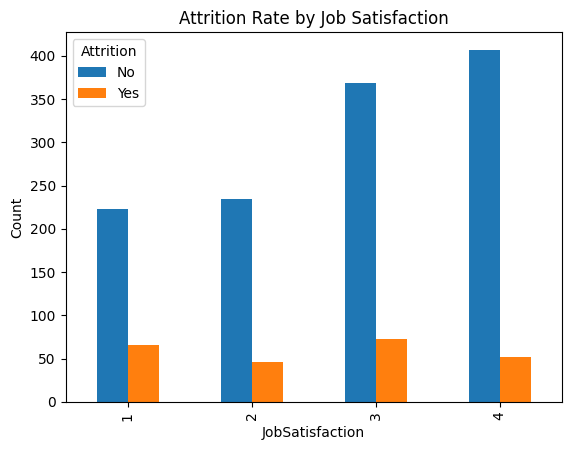

In [15]:
# attrition rate by department
attrition_by_dept = data.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()
attrition_by_dept.plot(kind='bar', stacked=True)
plt.title('Attrition Rate by Department')
plt.ylabel('Proportion')
plt.show()

# attrition rate by job satisafaction
attrition_by_job_satisfaction = data.groupby('JobSatisfaction')['Attrition'].value_counts(normalize=False).unstack()
attrition_by_job_satisfaction.plot(kind='bar', stacked=False)
plt.title('Attrition Rate by Job Satisfaction')
plt.ylabel('Count')
plt.show()


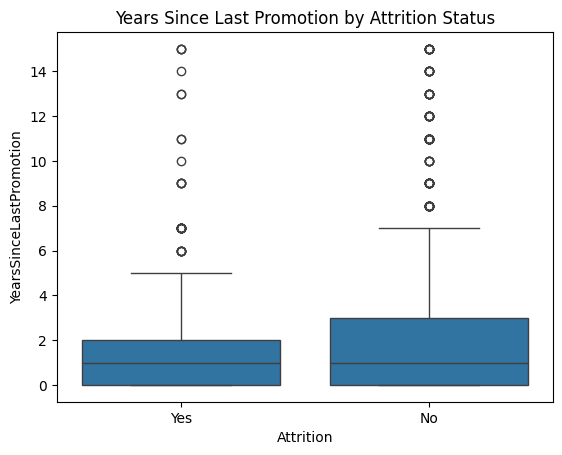

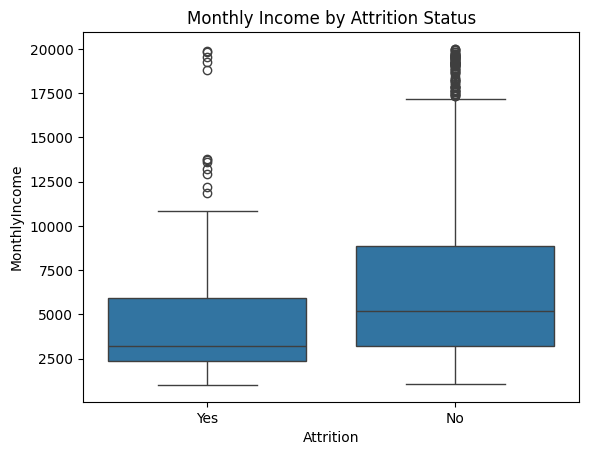

In [16]:
# relationship between YearsSinceLastPromotion and Attrition
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=data)
plt.title('Years Since Last Promotion by Attrition Status')
plt.show()

# relationship between MonthlyIncome and Attrition
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data)
plt.title('Monthly Income by Attrition Status')
plt.show()

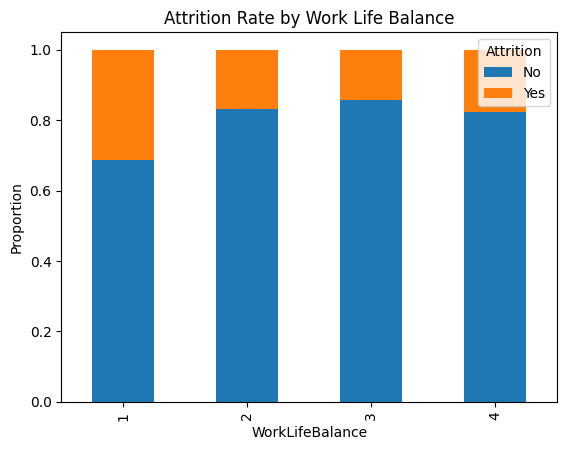

In [17]:
#attrition rate by WorkLifeBalance
attrition_by_work_life_balance = data.groupby('WorkLifeBalance')['Attrition'].value_counts(normalize=True).unstack()
attrition_by_work_life_balance.plot(kind='bar', stacked=True)
plt.title('Attrition Rate by Work Life Balance')
plt.ylabel('Proportion')
plt.show()


Attrition by Overtime:
Attrition        No       Yes
OverTime                     
No         0.895636  0.104364
Yes        0.694712  0.305288


<Figure size 800x500 with 0 Axes>

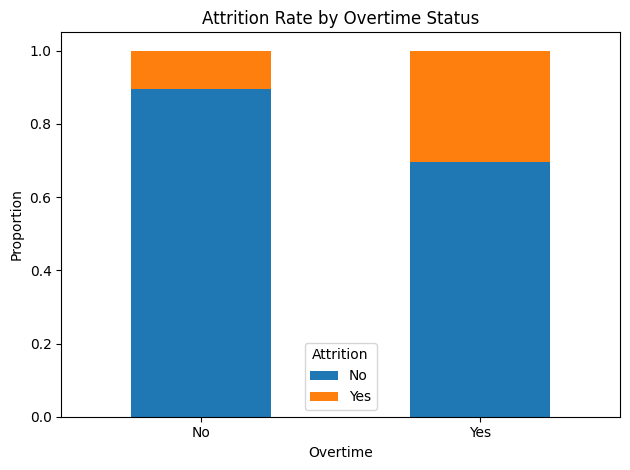


Attrition by Marital Status:
Attrition            No       Yes
MaritalStatus                    
Divorced       0.899083  0.100917
Married        0.875186  0.124814
Single         0.744681  0.255319


<Figure size 800x500 with 0 Axes>

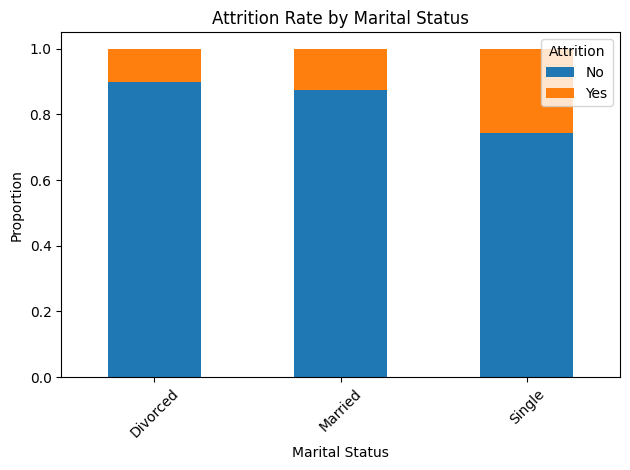


Attrition by Job Role:
Attrition                        No       Yes
JobRole                                      
Sales Representative       0.602410  0.397590
Laboratory Technician      0.760618  0.239382
Human Resources            0.769231  0.230769
Sales Executive            0.825153  0.174847
Research Scientist         0.839041  0.160959
Manufacturing Director     0.931034  0.068966
Healthcare Representative  0.931298  0.068702
Manager                    0.950980  0.049020
Research Director          0.975000  0.025000


<Figure size 1200x600 with 0 Axes>

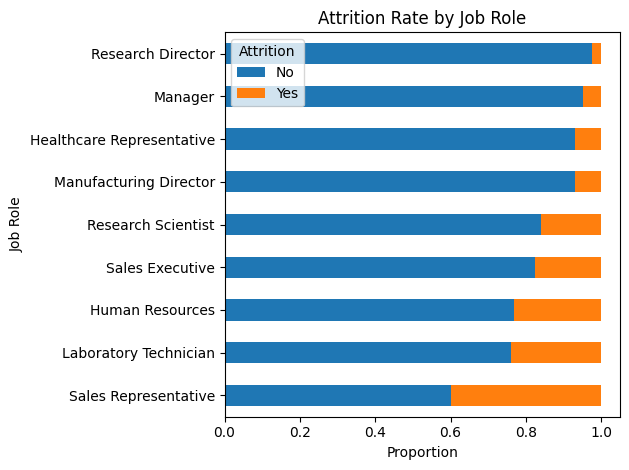


Distance From Home Statistics by Attrition:
            count       mean       std  min  25%  50%   75%   max
Attrition                                                        
No         1233.0   8.915653  8.012633  1.0  2.0  7.0  13.0  29.0
Yes         237.0  10.632911  8.452525  1.0  3.0  9.0  17.0  29.0


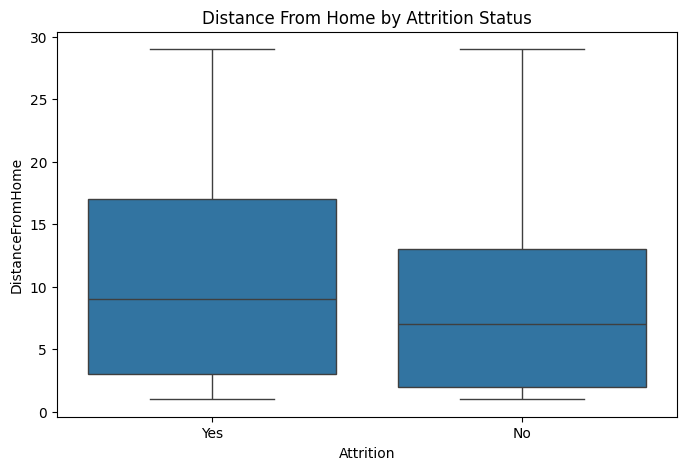

In [18]:
# Overtime and attrition
print("\nAttrition by Overtime:")
overtime_attrition = data.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack()
print(overtime_attrition)

plt.figure(figsize=(8, 5))
overtime_attrition.plot(kind='bar', stacked=True)
plt.title('Attrition Rate by Overtime Status')
plt.ylabel('Proportion')
plt.xlabel('Overtime')
plt.xticks(rotation=0)
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

# Marital status and attrition
print("\nAttrition by Marital Status:")
marital_attrition = data.groupby('MaritalStatus')['Attrition'].value_counts(normalize=True).unstack()
print(marital_attrition)

plt.figure(figsize=(8, 5))
marital_attrition.plot(kind='bar', stacked=True)
plt.title('Attrition Rate by Marital Status')
plt.ylabel('Proportion')
plt.xlabel('Marital Status')
plt.xticks(rotation=45)
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

# Job role and attrition
print("\nAttrition by Job Role:")
role_attrition = data.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack()
print(role_attrition.sort_values('Yes', ascending=False))

plt.figure(figsize=(12, 6))
role_attrition.sort_values('Yes', ascending=False).plot(kind='barh', stacked=True)
plt.title('Attrition Rate by Job Role')
plt.xlabel('Proportion')
plt.ylabel('Job Role')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

# Distance from home and attrition
print("\nDistance From Home Statistics by Attrition:")
print(data.groupby('Attrition')['DistanceFromHome'].describe())

plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=data)
plt.title('Distance From Home by Attrition Status')
plt.show()

# Years at company and attr